In [3]:
import numpy as np
import sqlite3
import plotly.express as px
import pandas as pd
import sqlite3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from useful_functions_2 import *
from pdf2image import convert_from_path
from sklearn.manifold import TSNE
import statistics

### leaf Microbiome Figure 1

In [4]:
taxa_level = 'Genera'
table_name = 'tPlantMicrobe' + taxa_level
tables_to_join = [table_name, "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')
opdf = opdf.reset_index()
opdf = opdf.fillna(0)    
col_list1 = []
for i in opdf.columns:
    col_list1.append(i.split('|')[-1])
opdf.columns = col_list1
taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])

In [6]:
site_list = opdf['site_id']

opdf['BGR'] = site_list

opdf['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
opdf = opdf[opdf["BGR"].isin([0,1,2,3])]

opdf['BGR'] = opdf['BGR'].replace([0], 'Wintergreen')
opdf['BGR'] = opdf['BGR'].replace([1], 'Cole Mountain')
opdf['BGR'] = opdf['BGR'].replace([2], 'Blacksburg')
opdf['BGR'] = opdf['BGR'].replace([3], 'HR')

C:\Users\15404\AppData\Local\Temp\ipykernel_4628\921536217.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list


In [15]:
opdf = opdf[opdf["species"].isin(['syriaca', 'exaltata', 'hybrid'])]
v2_list = opdf['V2']
v2_list = round(v2_list)
opdf['genetic_species'] = v2_list
opdf['genetic_species'] = opdf['genetic_species'].replace([0], 'exaltata')
opdf['genetic_species'] = opdf['genetic_species'].replace([1], 'syriaca')

(145, 1413)
(145, 1413)


C:\Users\15404\AppData\Local\Temp\ipykernel_4628\2027566316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1).tolist()
C:\Users\15404\AppData\Local\Temp\ipykernel_4628\2027566316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1).tolist()
C:\Users\15404\AppData\Local\Temp\ipykernel_4628\2027566316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

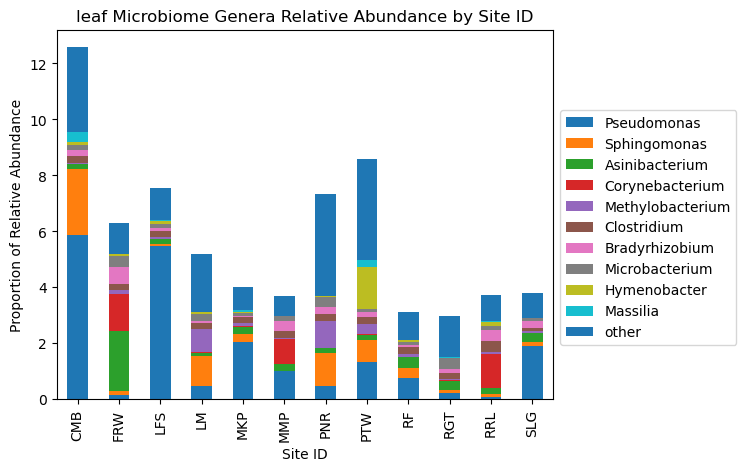

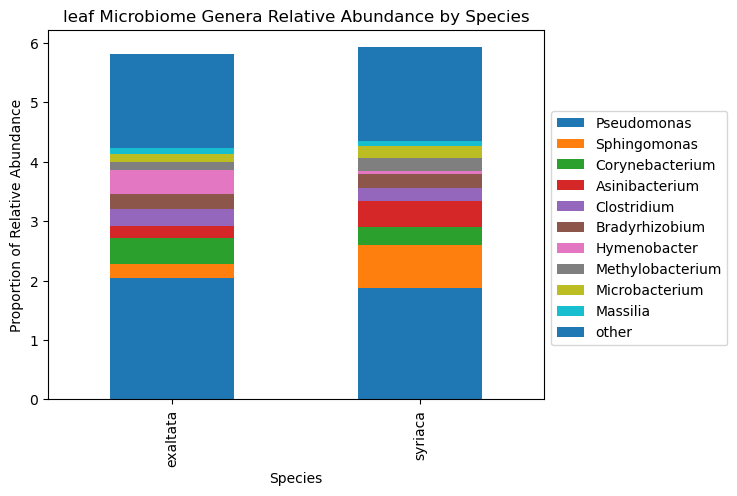

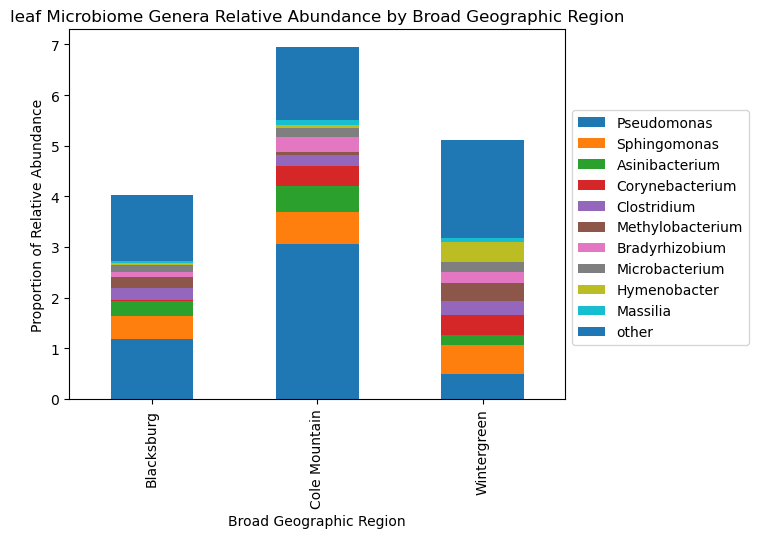

In [19]:
sort_list = ['site_id', 'genetic_species', 'BGR']
for sort_id in sort_list:
    df1 = opdf.groupby([sort_id])[taxa_columns].mean()
    df1 = df1.reset_index()
    new_columns = df1[taxa_columns].sum().nlargest(10)
    col_list = []
    for i in new_columns.axes[0]:
        col_list.append(i)
    col_list.append(sort_id)
    other_col = df1.columns
    other_col = other_col.drop(col_list)
    df2 = df1[col_list]
    df3 = df1[other_col]
    df2['other'] = df3.sum(axis = 1).tolist()
    ax = df2.plot.bar(x = sort_id, stacked=True)    
    
    name_dict = {'site_id': 'Site ID', 'genetic_species': 'Species', 'BGR': 'Broad Geographic Region'}
    graph_inf = name_dict[sort_id] 
    
    ax.set_xlabel(graph_inf)
    ax.set_ylabel('Proportion of Relative Abundance')
    ax.set_title('Leaf Microbiome Genera Relative Abundance by ' + graph_inf)
    
    ax.legend(bbox_to_anchor=(1,0.8))
    
    if sort_id == 'site_id':
        plt.savefig('./leaf_microbiome_figures/fig_1_a.pdf', dpi=300, bbox_inches='tight')
    elif sort_id == 'genetic_species':
        plt.savefig('./leaf_microbiome_figures/fig_1_b.pdf', dpi=300, bbox_inches='tight')
    elif sort_id == 'BGR':
        plt.savefig('./leaf_microbiome_figures/fig_1_c.pdf', dpi=300, bbox_inches='tight')

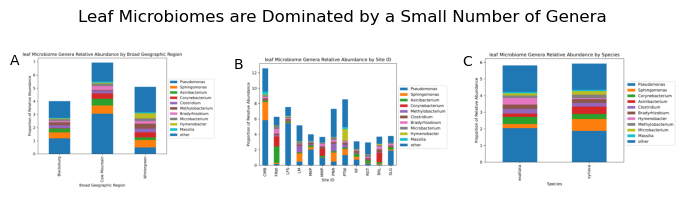

In [20]:
img1=convert_from_path('./leaf_microbiome_figures/fig_1_a.pdf')
img2=convert_from_path('./leaf_microbiome_figures/fig_1_b.pdf')
img3=convert_from_path('./leaf_microbiome_figures/fig_1_c.pdf')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 2))

ax[0].imshow(img3[0])
ax[1].imshow(img1[0])
ax[2].imshow(img2[0])

# plot 2 subplots
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')


ax[0].annotate("A", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1].annotate("B", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2].annotate("C", xy=(-0.05, 0.9), xycoords="axes fraction")


fig.suptitle('Leaf Microbiomes are Dominated by a Small Number of Genera')
plt.tight_layout()
plt.show()

fig.savefig('./leaf_microbiome_figures/figure_1_leaf.pdf', bbox_inches='tight', dpi = 1000)

### leaf Microbiome Figure 2

In [29]:
taxa_level = 'Genera'
table_name = 'tPlantMicrobe' + taxa_level
tables_to_join = [table_name, "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
print(full_df.shape)
full_df = full_df[full_df["species"].isin(['syriaca', 'exaltata', 'hybrid'])]
print(full_df.shape)

opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')

origin_pivoted_df = opdf.copy()
row_sum = origin_pivoted_df.sum(axis=1)

origin_pivoted_df = origin_pivoted_df.reset_index()

genera_col = origin_pivoted_df.columns
genera_col = genera_col.drop(['sample_id','site_id', 'species', 'V2'])

sub_pivot = origin_pivoted_df[genera_col].astype(float)

for row in range(sub_pivot.shape[0]):
    sub_pivot.loc[row] = sub_pivot.loc[row]/row_sum[row]

new_sum = sub_pivot.sum(axis=1)
new_sum

origin_pivoted_df[genera_col] = sub_pivot

origin_pivoted_df.head()

row_sum = origin_pivoted_df[genera_col].sum(axis=1)
print(row_sum)

opdf = origin_pivoted_df.copy()
opdf = opdf.reset_index()

opdf = opdf.fillna(0)  
col_list1 = []
for i in opdf.columns:
    col_list1.append(i.split('|')[-1])
opdf.columns = col_list1

taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])

(39695, 13)
(37692, 13)
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
140    1.0
141    1.0
142    1.0
143    1.0
144    1.0
Length: 145, dtype: float64


In [30]:
v2_list = opdf['V2']
v2_list = round(v2_list)
opdf['genetic_species'] = v2_list
opdf['genetic_species'] = opdf['genetic_species'].replace([0], 'exaltata')
opdf['genetic_species'] = opdf['genetic_species'].replace([1], 'syriaca')

In [31]:
site_list = opdf['site_id']

opdf['BGR'] = site_list

opdf['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
opdf = opdf[opdf["BGR"].isin([0,1,2,3])]

opdf['BGR'] = opdf['BGR'].replace([0], 'Wintergreen')
opdf['BGR'] = opdf['BGR'].replace([1], 'Cole Mountain')
opdf['BGR'] = opdf['BGR'].replace([2], 'Blacksburg')
opdf['BGR'] = opdf['BGR'].replace([3], 'HR')

In [32]:
#reshaped_df.columns.name = None
opdf.columns.name = None
opdf.head()

,index,sample_id,site_id,species,V2,Halapricum,Halorussus,Halococcus,Halobellus,Haloferax,...,Bathycoccus,Ostreococcus,Micromonas,Chlorella,Prototheca,Mortierella,Mucor,Rhizopus,genetic_species,BGR
0,0,CMB10,CMB,syriaca,0.999777,0.002208,0.0,0.001176,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000010,0.000008,0.0,0.0,syriaca,Cole Mountain
1,1,CMB11,CMB,syriaca,1.000000,0.003298,0.0,0.001197,0.0,0.0,...,0.000015,0.0,0.000015,0.0,0.000021,0.000000,0.0,0.0,syriaca,Cole Mountain
2,2,CMB13,CMB,syriaca,0.989131,0.000000,0.0,0.000000,0.0,0.0,...,0.000234,0.0,0.000137,0.0,0.000000,0.000000,0.0,0.0,syriaca,Cole Mountain
3,3,CMB14,CMB,syriaca,0.999992,0.007447,0.0,0.002588,0.0,0.0,...,0.000000,0.0,0.000048,0.0,0.000056,0.000000,0.0,0.0,syriaca,Cole Mountain
4,4,CMB15,CMB,syriaca,0.998548,0.000354,0.0,0.000144,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,syriaca,Cole Mountain


In [33]:
opdf = opdf.drop(['index'], axis = 1)
opdf.head()

,sample_id,site_id,species,V2,Halapricum,Halorussus,Halococcus,Halobellus,Haloferax,Halogeometricum,...,Bathycoccus,Ostreococcus,Micromonas,Chlorella,Prototheca,Mortierella,Mucor,Rhizopus,genetic_species,BGR
0,CMB10,CMB,syriaca,0.999777,0.002208,0.0,0.001176,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000010,0.000008,0.0,0.0,syriaca,Cole Mountain
1,CMB11,CMB,syriaca,1.000000,0.003298,0.0,0.001197,0.0,0.0,0.0,...,0.000015,0.0,0.000015,0.0,0.000021,0.000000,0.0,0.0,syriaca,Cole Mountain
2,CMB13,CMB,syriaca,0.989131,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000234,0.0,0.000137,0.0,0.000000,0.000000,0.0,0.0,syriaca,Cole Mountain
3,CMB14,CMB,syriaca,0.999992,0.007447,0.0,0.002588,0.0,0.0,0.0,...,0.000000,0.0,0.000048,0.0,0.000056,0.000000,0.0,0.0,syriaca,Cole Mountain
4,CMB15,CMB,syriaca,0.998548,0.000354,0.0,0.000144,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,syriaca,Cole Mountain


In [34]:
taxa_columns = taxa_columns.drop('index')

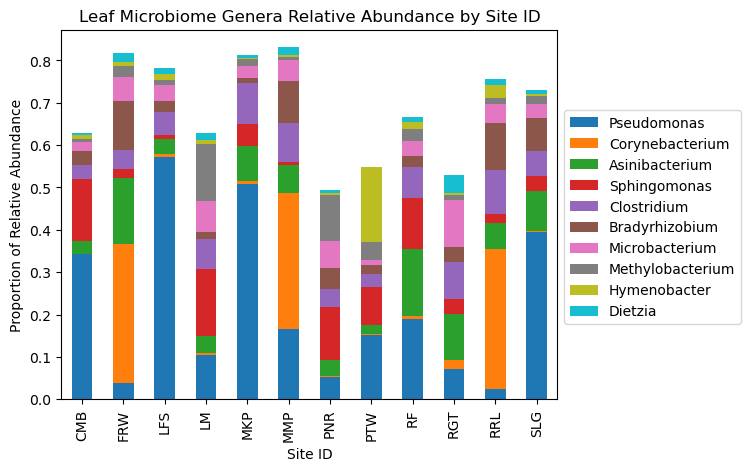

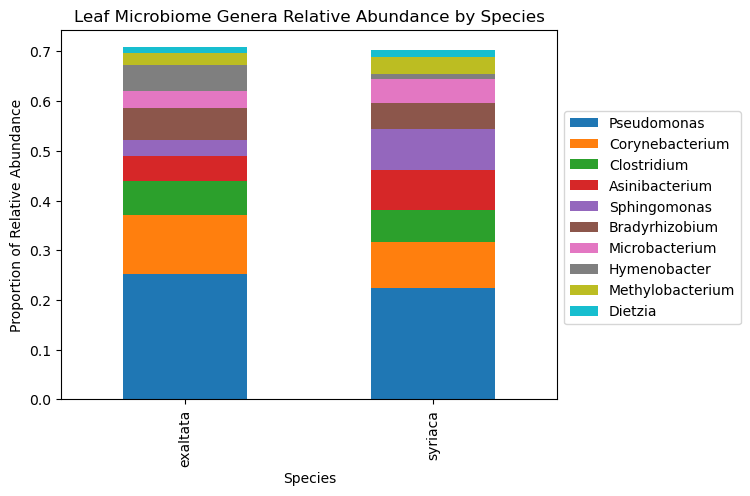

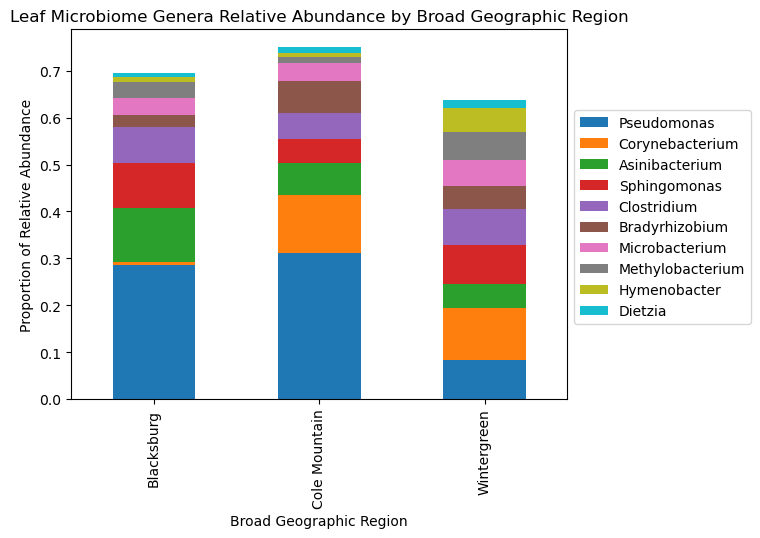

In [52]:
sort_list = ['site_id', 'genetic_species', 'BGR']
for sort_id in sort_list:
    df1 = opdf.groupby([sort_id])[taxa_columns].mean()
    df1 = df1.reset_index()
    new_columns = df1[taxa_columns].sum().nlargest(10)
    col_list = []
    for i in new_columns.axes[0]:
        col_list.append(i)
    col_list.append(sort_id)
    df2 = df1[col_list]
    ax = df2.plot.bar(x = sort_id, stacked=True)
    
    name_dict = {'site_id': 'Site ID', 'genetic_species': 'Species', 'BGR': 'Broad Geographic Region'}
    graph_inf = name_dict[sort_id] 
    
    ax.set_xlabel(graph_inf)
    ax.set_ylabel('Proportion of Relative Abundance')
    ax.set_title('Leaf Microbiome Genera Relative Abundance by ' + graph_inf)
    ax.legend(bbox_to_anchor=(1,0.8))
    
    if sort_id == 'site_id':
        plt.savefig('./leaf_microbiome_figures/fig_2_a.pdf', dpi=300, bbox_inches='tight')
    elif sort_id == 'genetic_species':
        plt.savefig('./leaf_microbiome_figures/fig_2_b.pdf', dpi=300, bbox_inches='tight')
    elif sort_id == 'BGR':
        plt.savefig('./leaf_microbiome_figures/fig_2_c.pdf', dpi=300, bbox_inches='tight')

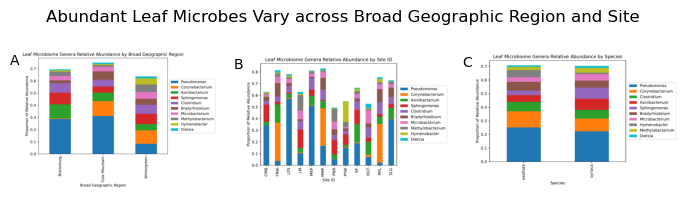

In [54]:
img1=convert_from_path('./leaf_microbiome_figures/fig_2_a.pdf')
img2=convert_from_path('./leaf_microbiome_figures/fig_2_b.pdf')
img3=convert_from_path('./leaf_microbiome_figures/fig_2_c.pdf')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 2))

ax[0].imshow(img3[0])
ax[1].imshow(img1[0])
ax[2].imshow(img2[0])

# plot 2 subplots
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')


ax[0].annotate("A", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1].annotate("B", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2].annotate("C", xy=(-0.05, 0.9), xycoords="axes fraction")


fig.suptitle('Abundant Leaf Microbes Vary across Broad Geographic Region and Site')
plt.tight_layout()
plt.show()

fig.savefig('./leaf_microbiome_figures/figure_2_leaf.pdf', bbox_inches='tight', dpi = 1000)

### leaf Microbiome Figure 3

In [14]:
taxa_level = 'Genera'
table_name = 'tPlantMicrobe' + taxa_level
tables_to_join = [table_name, "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')

origin_pivoted_df = opdf.copy()
row_sum = origin_pivoted_df.sum(axis=1)

origin_pivoted_df = origin_pivoted_df.reset_index()

genera_col = origin_pivoted_df.columns
genera_col = genera_col.drop(['sample_id','site_id', 'species', 'V2'])

sub_pivot = origin_pivoted_df[genera_col].astype(float)

for row in range(sub_pivot.shape[0]):
    sub_pivot.loc[row] = sub_pivot.loc[row]/row_sum[row]

new_sum = sub_pivot.sum(axis=1)
new_sum

origin_pivoted_df[genera_col] = sub_pivot

origin_pivoted_df.head()

row_sum = origin_pivoted_df[genera_col].sum(axis=1)

opdf = origin_pivoted_df.copy()
opdf = opdf.reset_index()

opdf = opdf.fillna(0)  
col_list1 = []
for i in opdf.columns:
    col_list1.append(i.split('|')[-1])
opdf.columns = col_list1

taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])

In [15]:
site_list = opdf['site_id']

opdf['BGR'] = site_list

opdf['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
opdf = opdf[opdf["BGR"].isin([0,1,2,3])]

opdf['BGR'] = opdf['BGR'].replace([0], 'Wintergreen')
opdf['BGR'] = opdf['BGR'].replace([1], 'Cole Mountain')
opdf['BGR'] = opdf['BGR'].replace([2], 'Blacksburg')
opdf['BGR'] = opdf['BGR'].replace([3], 'HR')

In [16]:
opdf = opdf.drop(['index'], axis = 1)
opdf = opdf.reset_index(drop=True)
opdf.columns.name = None
opdf.head()

,sample_id,site_id,species,V2,Halapricum,Halorussus,Halococcus,Halobellus,Haloferax,Halogeometricum,...,Ustilago,Bathycoccus,Ostreococcus,Micromonas,Chlorella,Prototheca,Mortierella,Mucor,Rhizopus,BGR
0,CMB10,CMB,syriaca,0.999777,0.002208,0.0,0.001176,0.0,0.0,0.0,...,0.000010,0.000000,0.0,0.000000,0.0,0.000010,0.000008,0.0,0.0,Cole Mountain
1,CMB11,CMB,syriaca,1.000000,0.003298,0.0,0.001197,0.0,0.0,0.0,...,0.000028,0.000015,0.0,0.000015,0.0,0.000021,0.000000,0.0,0.0,Cole Mountain
2,CMB13,CMB,syriaca,0.989131,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000094,0.000234,0.0,0.000137,0.0,0.000000,0.000000,0.0,0.0,Cole Mountain
3,CMB14,CMB,syriaca,0.999992,0.007447,0.0,0.002588,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000048,0.0,0.000056,0.000000,0.0,0.0,Cole Mountain
4,CMB15,CMB,syriaca,0.998548,0.000354,0.0,0.000144,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,Cole Mountain


In [17]:
df = opdf.copy()

In [18]:
site_list = df['site_id']

df['BGR'] = site_list

df['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
df = df[df["BGR"].isin([0,1,2,3])]

df['BGR'] = df['BGR'].replace([0], 'Wintergreen')
df['BGR'] = df['BGR'].replace([1], 'Cole Mountain')
df['BGR'] = df['BGR'].replace([2], 'Blacksburg')
df['BGR'] = df['BGR'].replace([3], 'HR')

site_list = ['RRL', 'FRW', 'MMP', 'PNR', 'CMB', 'SLG', 'RF', 'LFS', 'PTW', 'LM', 'MKP', 'RGT']

# Predefined set of colors
unique_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'pink', 'brown', 'gray', 'olive', 'lime', 'teal']

# Create a dictionary with list elements as keys and corresponding colors as values
site_color_dict = dict(zip(site_list, unique_colors))

print(site_color_dict)

{'RRL': 'red', 'FRW': 'green', 'MMP': 'blue', 'PNR': 'orange', 'CMB': 'purple', 'SLG': 'cyan', 'RF': 'pink', 'LFS': 'brown', 'PTW': 'gray', 'LM': 'olive', 'MKP': 'lime', 'RGT': 'teal'}


In [19]:
taxa_columns = taxa_columns.drop(['index'])

In [20]:
X = df[taxa_columns]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

drop_indexs = []
for i in enumerate(principal_components):
    if i[1][0] > 0.5:
        print(i)
        drop_indexs.append(i[0])
    if i[1][1] > 0.5:
        print(i)
        drop_indexs.append(i[0])

df = df.drop(index=drop_indexs)

(5, array([0.59627436, 0.13365185]))
(8, array([0.59112487, 0.12383384]))
(13, array([0.51988033, 0.10637649]))
(36, array([0.53191716, 0.11924793]))
(39, array([0.51468956, 0.11064944]))
(40, array([0.67472527, 0.17419716]))
(41, array([0.5665626 , 0.13290658]))
(48, array([0.63810104, 0.15568122]))
(153, array([0.58102915, 0.13885259]))


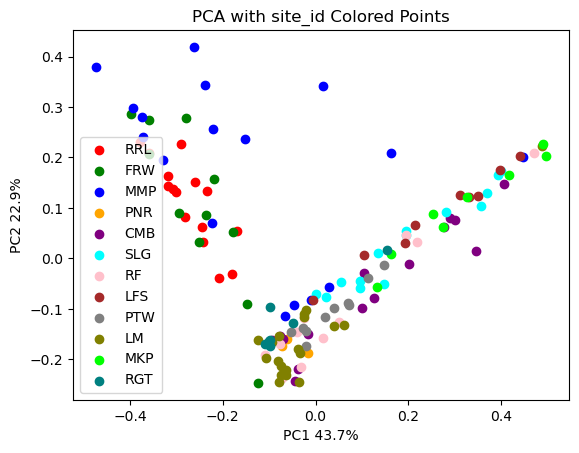

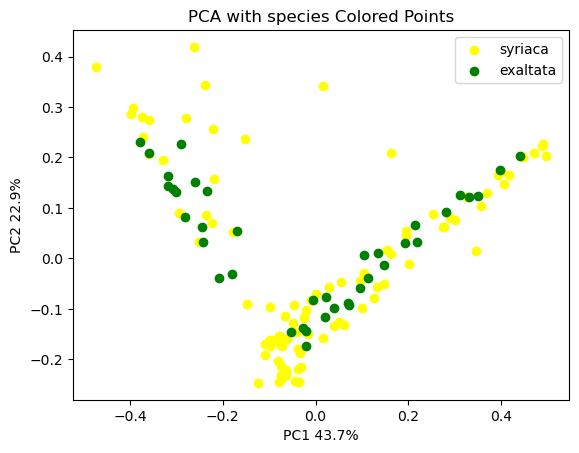

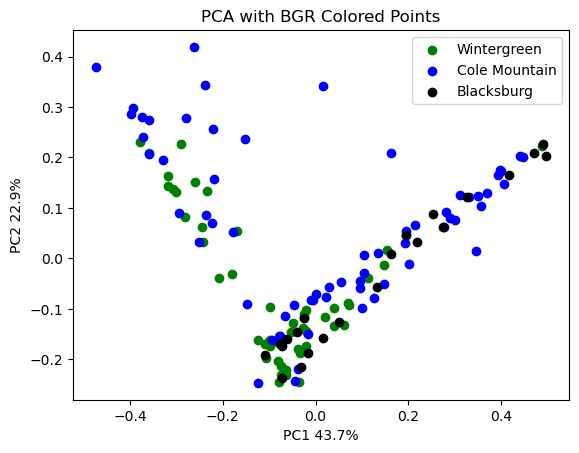

In [21]:
X = df[taxa_columns]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

for graph_type in ['site_id', 'species', 'BGR']:
    if graph_type == 'site_id':
        colors = site_color_dict
    elif graph_type == 'species':
        colors = {'syriaca': 'yellow', 'exaltata': 'green'}
    else:
        colors = {'Wintergreen': 'green', 'Cole Mountain': 'blue', 'Blacksburg': 'black'}
    
    fig, ax = plt.subplots()

    for key, color in colors.items():
        mask = (df[graph_type] == key)
        ax.scatter(
            principal_components[mask, 0],
            principal_components[mask, 1],
            c=color,
            label= key
        )
    
    ax.set_xlabel("PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%')
    ax.set_ylabel("PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
    ax.set_title('PCA with ' + graph_type + ' Colored Points')
    ax.legend()
    plt.show()
    if graph_type == 'site_id':
        fig.savefig('./leaf_microbiome_figures/fig_3_a.pdf', dpi=300, bbox_inches='tight')
    elif graph_type == 'species':
        fig.savefig('./leaf_microbiome_figures/fig_3_b.pdf', dpi=300, bbox_inches='tight')
    else:
        fig.savefig('./leaf_microbiome_figures/fig_3_c.pdf', dpi=300, bbox_inches='tight')


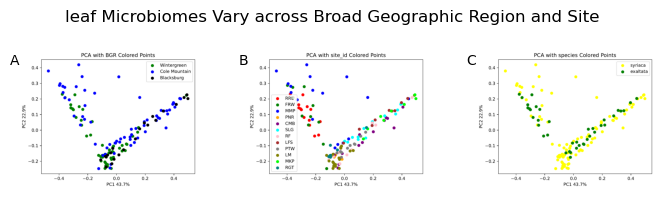

In [22]:
img1=convert_from_path('./leaf_microbiome_figures/fig_3_a.pdf')
img2=convert_from_path('./leaf_microbiome_figures/fig_3_b.pdf')
img3=convert_from_path('./leaf_microbiome_figures/fig_3_c.pdf')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 2))

ax[0].imshow(img3[0])
ax[1].imshow(img1[0])
ax[2].imshow(img2[0])

# plot 2 subplots
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')


ax[0].annotate("A", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1].annotate("B", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2].annotate("C", xy=(-0.05, 0.9), xycoords="axes fraction")


fig.suptitle('leaf Microbiomes Vary across Broad Geographic Region and Site')
plt.tight_layout()
plt.show()

fig.savefig('./leaf_microbiome_figures/figure_3.pdf', bbox_inches='tight', dpi = 1000)

### Calculate Proportions of 10 most abundant Genera based on Relative Abundance

In [24]:
taxa_level = 'Genera'
table_name = 'tPlantMicrobe' + taxa_level
tables_to_join = [table_name, "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')
opdf = opdf.reset_index()
opdf = opdf.fillna(0)    
taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])

In [26]:
site_list = opdf['site_id']

opdf['BGR'] = site_list

opdf['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
opdf = opdf[opdf["BGR"].isin([0,1,2,3])]

opdf['BGR'] = opdf['BGR'].replace([0], 'Wintergreen')
opdf['BGR'] = opdf['BGR'].replace([1], 'Cole Mountain')
opdf['BGR'] = opdf['BGR'].replace([2], 'Blacksburg')
opdf['BGR'] = opdf['BGR'].replace([3], 'HR')

In [33]:
new_columns = opdf[taxa_columns].sum().nlargest(10)
top_10_list = []
for i in new_columns.axes[0]:
    top_10_list.append(i)

col_list = top_10_list.copy()

other_col = opdf.columns
other_col = other_col.drop(['sample_id', 'site_id', 'species', 'V2', 'BGR'])
other_col = other_col.drop(top_10_list)

print(len(top_10_list))
print(len(other_col))

10
1397


In [36]:
top_10_sum = opdf[top_10_list].sum(axis = 1)
other_sum = opdf[other_col].sum(axis = 1)

In [46]:
other_sum

0      5.05417
1      2.26757
2      5.29025
3      1.50364
4      5.23159
        ...   
150    1.48271
151    0.38471
152    0.69077
153    1.21600
154    0.33300
Length: 155, dtype: float64

In [47]:
total_sum = top_10_sum + other_sum
total_sum

0      13.60729
1       7.54314
2      57.63579
3       3.74102
4      21.84841
         ...   
150     6.19584
151     1.45741
152     3.02519
153    11.29445
154     1.08259
Length: 155, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c04601cc90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c046197090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c04601ff90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c046016b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c045f3b750>],
 'means': []}

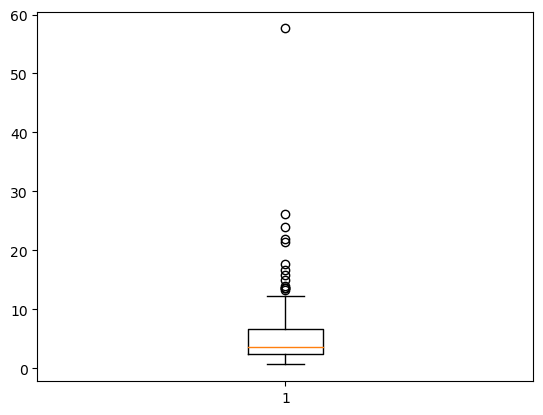

In [50]:
plt.boxplot(total_sum)

In [ ]:
### Proportion of

In [42]:
total_abundance = 0
for i in zip(top_10_sum, other_sum):
    total_abundance+=(i[0]/(i[0]+i[1]))

print('Proportion of top 10 Genera out of total Genera')    
print(total_abundance/len(top_10_sum))

print('Total Number of Genera:', (len(other_col) + 10))

Proportion of top 10 Genera out of total Genera
0.6971912042944731
Total Number of Genera: 1407


In [38]:
combined_abundance = []
for i in zip(top_10_sum, other_sum):
    combined_abundance.append((i[0]+i[1]))
print(sum(combined_abundance)/len(combined_abundance))
print(statistics.pstdev(combined_abundance))

5.6638516129032235
6.280350460822562


### Calculate average identified abundance for each BGL, Site, and Species

In [43]:
taxa_level = 'Genera'
table_name = 'tPlantMicrobe' + taxa_level
tables_to_join = [table_name, "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')
opdf = opdf.reset_index()
opdf = opdf.fillna(0)    
col_list1 = []
for i in opdf.columns:
    col_list1.append(i.split('|')[-1])
opdf.columns = col_list1
taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])

In [44]:
site_list = opdf['site_id']

opdf['BGR'] = site_list

opdf['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
opdf = opdf[opdf["BGR"].isin([0,1,2,3])]

opdf['BGR'] = opdf['BGR'].replace([0], 'Wintergreen')
opdf['BGR'] = opdf['BGR'].replace([1], 'Cole Mountain')
opdf['BGR'] = opdf['BGR'].replace([2], 'Blacksburg')
opdf['BGR'] = opdf['BGR'].replace([3], 'HR')

C:\Users\15404\AppData\Local\Temp\ipykernel_10840\921536217.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list


In [ ]:
opdf.head()

### Calculate Identified Abundance for Site, BGR, and Species

In [ ]:
sort_list = ['site_id', 'BGR', 'species']
for sort_id in sort_list:
    print(sort_id)
    group_list = (taxa_columns.copy()).to_list()
    group_list.append(sort_id)
    df1 = opdf[group_list]
    df1 = df1.groupby([sort_id]).mean()
    df1 = df1.reset_index()
    for i in df1[sort_id]:
        subdf = df1[df1[sort_id] == i]
        print(i + ' Mean:', round(subdf[taxa_columns].sum(axis = 1).to_list()[0], 3))
    print('')

In [ ]:
site_list = opdf['site_id'].unique()
for site in site_list:
    print(site, opdf[opdf['site_id'] == site][taxa_columns].sum(axis = 1).std())

print('')
BGR_list = opdf['BGR'].unique()
for bgl in BGR_list:
    print(bgl, opdf[opdf['BGR'] == bgl][taxa_columns].sum(axis = 1).std())

print('')
species_list = opdf['species'].unique()
for spec in species_list:
    print(spec, opdf[opdf['species'] == spec][taxa_columns].sum(axis = 1).std())

In [ ]:
opdf[taxa_columns].sum(axis = 1).std()